# DBSCAN - Density-Based Spatial Clustering of Applications with Noise

## Learning objectives
- understand the DBSCAN algorithm
- implement the DBSCAN algorithm from scratch
- implement the DBSCAN algorithm in Sklearn

## Intro - The DBSCAN algorithm

DBSCAN is a non-parametric clustering technique. 
It does this by classifying points as 1 of 3 types: 
- core points - those with $\epsilon$ or more points within a radius of $d$ from it.  Core points are those with $\epsilon$ or more points within a radius of $d$ from it. 
- directly reachable points - those within a distance $d$ from a core point.
- noise points - those not within a distance $d$ from a core point.

In the image directly below, each example in our dataset is surrounded by a circle of radius $d$.
Red points are core points.
Yellow points are directly reachable points.
Blue points are noise points.

![](images/dbscan.png)

It can cluster arbitrarily shaped regions of datapoints, unlike K-means clustering. 

![](images/dbscan-clusters.png)

We can see that the algorithm is pretty simple: 
- Firstly, for each example, compute whether it is a core, non-core or noise point.
- Assign core or non-core points within the epsilon-neighbourhood of other core points to the same class

As such, we are going to spend some time implementing the algorithm from scratch ourselves, outside of the template to the solution provided in this notebook. Open up your own clean, empty Python file and start from there! You can copy and complete the code from the next 2 code cells to (1) get some data and (2) define the function to compute the distances between two sets of data.

## Implementation from scratch

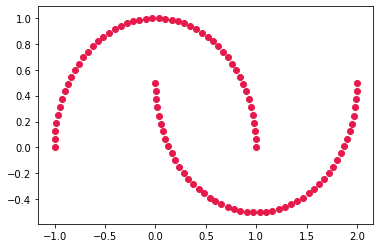

In [2]:
import numpy as np
np.set_printoptions(suppress=True)
import sys
sys.path.append('..') # append path to utils file to python path
from utils import get_classification_data, show_data, visualise_predictions, colors
import matplotlib.pyplot as plt
import sklearn.datasets
from time import sleep

X, Y = sklearn.datasets.make_moons()
Y = np.zeros_like(Y)
show_data(X, Y)

In [ ]:
def compute_distances(input_X, dataset_X):
    """Takes in an array of inputs and finds each of their distances from every example in a dataset"""
    distances = ## matrix of distances between each input x and each x in our dataset
    for ## enumerate over input
        for ## enumerate over dataset
            distance = ## compute euclidian distance
            distances[i][j] = ## put this distance in the distances matrix
    return distances

distances: (100, 100)
[2 2 2 1 1 2 2 2 2 1 1 2 2 1 1 2 1 1 2 1 2 2 2 1 1 1 2 2 1 2 2 1 2 2 1 1 1
 2 2 2 2 2 1 1 1 2 2 2 1 1 1 2 1 2 2 1 2 2 1 1 1 1 2 2 1 2 2 2 2 2 2 2 1 1
 1 2 1 1 1 2 2 2 2 1 2 1 1 2 1 2 2 1 2 1 2 2 1 1 2 1]


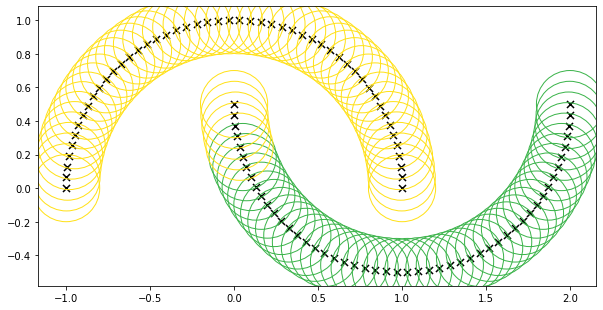

In [3]:

class DBSCAN:
    def __init__(self, X, epsilon=5, min_pts=3):
        self.X = X
        self.epsilon = epsilon # the radius of the neighbourhood of each core point
        self.min_pts = min_pts + 1 # because we dont want it to consider itself as a neighbour
        # self.dataset_predictions = self.predict(self.X, self.X)
    

    def predict(self, X):
        # print(X)
        m = len(X)
        distances = ## compute distances between the datapoints which we are making prediction for and those in our dataset
        within_radius = np.zeros_like(distances)
        within_radius[distances <= self.epsilon] = 1
        
        print('distances:', distances.shape)
        # print(within_radius)
        n_within_radius = ## compute how many neighbours each datapoint has
        # print(n_within_radius)
        core_pt_idxs = ## find the indices of the core points
        # print('core pts:', core_pt_idxs)
        non_core_pt_idxs = ## find indices of non core points
        # print('non core pts:', non_core_pt_idxs)
        noise_pt_idxs = ## find indices of noise points
        # print('noise pts:', noise_pt_idxs)
        
        predictions = ## initialise empty list of predictions
        n_clusters_found = 1 ## initialise cluster index (first cluster label) at 1 (noise points will keep the label 0)

        indices_of_core_pts_classified = ## initialise an empty set of all of the points which we've classified so far

        def get_neighbours_and_add_to_cluster(this_idx, cluster=set()):
            """Recursively find a datapoints neighbour and then add it to the cluster"""
            neighbour_idxs = ## get the indices of this datapoint's neighbours 
            for ## for each neighbour 
                if ## continue to next neighbour if this one is already in the cluster
                ## add this neighbour to the cluster
                child_cluster = ## find neighbours of this neighbour and add get a new cluster (recursion call)
                cluster = ## combine the current cluster and the one found from the line above
            ## return the cluster

        def get_neighbour_idxs(neighbour_distances):
            """Get indices of neighbours of a datapoint by checking if they are within epsilon distance"""
            n = ## get indices of points within radius
            return n

        for ## for each core point (which we know will be part of a cluster)
            if ## if it's already been classified
                # print('\talready classified')
                 ## continue
            # print('cluster idx:', n_clusters_found)
            cluster = ## find cluster which this core pt is a member of
            # print(cluster)
            indices_of_core_pts_classified = ## add the indices of the points that are in this cluster to the list of indices of points that we have already classified
            cluster = ## convert cluster to a list
            # print(len(cluster))
            predictions[cluster] = ## set predictions of datapoints in the cluster to the current cluster idx
            n_clusters_found += ## increment cluster index
        return ## rount predictions and then return them

    def predict_vis(self, X):
        self.predict()

    def visualise(self, predictions):
        """Function to visualise the predictions made by DBSCAN"""
        plt.ion()
        plt.show()
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111)
        ax.set_aspect('equal')

        for cluster_idx in list(set(predictions)):
            cluster_datapoints = self.X[predictions == cluster_idx]
            ax.scatter(cluster_datapoints[:, 0], cluster_datapoints[:, 1], s=50, marker='x', c='k')
            for x in cluster_datapoints:
                circle = plt.Circle((x[0], x[1]), self.epsilon, color=colors[cluster_idx], fill=False)
                ax.add_artist(circle)
        plt.show()

dbscan = DBSCAN(X, epsilon=0.2, min_pts=1)
cluster_predictions = dbscan.predict(X)
print(cluster_predictions)
dbscan.visualise(cluster_predictions)

Limitations of DBSCAN
- We need to compute the distance between each point and each other point
- our dataset may not contain samples that in reality are part of a cluster, but without them DBSCAN may cluster them separately